In [ ]:
# Copied from NFL equidistant areas on October 24, 2021.
# TODO: Keep it up to date

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.ticker import NullFormatter, FixedLocator
import math
from colorama import Fore, Back, Style
import os

In [3]:
valid_hex = '0123456789ABCDEF'.__contains__
def cleanhex(data):
    return ''.join(filter(valid_hex, data.upper()))

def fore_fromhex(text, hexcode):
    """print in a hex defined color"""
    hexint = int(cleanhex(hexcode), 16)
    
    if hexint >= 808080: # Halfway between white and black
        background = Back.BLACK
    else:
        background = Back.WHITE
        
    print(background
          + "\x1B[38;2;{};{};{}m{}\x1B[0m".format(hexint>>16
                                                  , hexint>>8&0xFF
                                                  , hexint&0xFF
                                                  , text)
         )

In [28]:
# All stadiums over time with lat/long, team, and start/end
stadia_header = ['coordinates', 'latitude', 'longitude', 'color', 'start', 'end']
stadia_alltime = [
    # Current NBA teams
    # NBA started with the 1949 NBL-BAA merger
    # Current NBA teams that joined from other leagues have their whole history listed
    # TODO: Comment out pre-NBA years for teams referenced in line above
    # https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_arenas
    
    # Celtics
    ['42°21′58.69″N 71°3′44.02″W', '#008348', 1995, np.inf]
    , ['42°21′57″N 71°3′42″W'  , '#008348', 1946, 1994  ] # Not counting occasional games at Hartford Civc Center or Boston Arena
    # Americans-Nets
    , ['40°40′57.58″N 73°58′30.81″W', '#000000', 2013, np.inf]
    , ['40°44′1″N 74°10′16″W', '#000000', 2010, 2011  ]
    , ['40°48′42″N 74°4′3″W' , '#000000', 1981, 2009  ]
    , ['40°31′31″N 74°26′28″W', '#000000', 1977, 1980  ]
    , ['40°43′22″N 73°35′26″W', '#000000', 1972, 1976  ]
    , ['40.707222, -73.656667', '#000000', 1969, 1971  ]
    , ['40.838333, -73.283333', '#000000', 1968, 1968  ]
    , ['40.910247, -73.998024', '#000000', 1967, 1967  ]
    # Knicks
    , ['40°45′2″N 73°59′37″W', '#f58426', 1968, np.inf] # Blue is #006bb6
    , ['40.7624, -73.9877', '#f58426', 1946, 1968] # not counting occasional games at the 69th regiment armory
    # Nationals-76ers
    , ['39°54′4″N 75°10′19″W', '#006bb6', 1996, np.inf] # Red is #ed174c
    , ['39°54′15″N 75°10′16″W', '#006bb6', 1967, 1995]
    , ['39.952664, -75.203364', '#006bb6', 1963, 1966] # Between two home stadiums
    , ['43.044722, -76.148333', '#006bb6', 1951, 1962]
    , ['43.074444, -76.218611', '#006bb6', 1949, 1950]
    # Raptors
    , ['43°38′36″N 79°22′45″W', '#CE1141', 2021, np.inf]
    , ['27.942778, -82.451944', '#CE1141', 2020, 2020]
    , ['43°38′36″N 79°22′45″W', '#CE1141', 1999, 2019]
    , ['43.641389, -79.389167', '#CE1141', 1995, 1998] # Not counting occasional games nearby
    # Balckhawks-Hawks
    , ['33°45′26″N 84°23′47″W', '#e03a3e', 1999, np.inf]
    , ['33.758, -84.401', '#e03a3e', 1997, 1998] # Not counting secondary stadium
    , ['33°45′27″N 84°23′48″W', '#e03a3e', 1972, 1996]
    , ['33°46′51″N 84°23′34″W', '#e03a3e', 1968, 1971]
    , ['38.627972, -90.201782', '#e03a3e', 1955, 1967] # Not counting secondary stadium
    , ['43°2′32″N 87°55′1″W', '#e03a3e', 1951, 1954]
    , ['41.4918315, -90.5106068', '#e03a3e', 1946, 1950] # Post move from Buffalo in 1946 season
    # Hornets-Bobcats
    , ['35°13′30″N 80°50′21″W', '#00788c', 2005, np.inf]
    , ['35°11′11″N 80°54′46″W', '#00788c', 2004, 2004] # Note gap
    , ['35°11′11″N 80°54′46″W', '#00788c', 1988, 2001]
    # Heat
    , ['25°46′53″N 80°11′17″W', '#98002e', 1999, np.inf]
    , ['25°46′51″N 80°11′44″W', '#98002e', 1988, 1998]
    # Magic
    , ['28°32′21″N 81°23′1″W', '#0077c0', 2010, np.inf]
    , ['28°32′56″N 81°23′12″W', '#0077c0', 1989, 2009]
    # Packers-Zephyrs-Bullets-Wizards
    , ['38.898056, -77.020833', '#002b5c', 1997, np.inf] # Red is #e31837
    , ['38°54′9″N 76°50′49″W', '#002b5c', 1973, 1996]
    , ['39°17′19″N 76°37′8″W', '#002b5c', 1963, 1972]
    , ['41.861944, -87.625', '#002b5c', 1962, 1962]
    , ['41°48′58″N 87°38′46″W', '#002b5c', 1961, 1961]
    # Bulls
    , ['41°52′50″N 87°40′27″W', '#CE1141', 1994, np.inf] # Alternate color is black
    , ['41°52′54″N 87°40′22″W', '#CE1141', 1967, 1993]
    , ['41°48′58″N 87°38′46″W', '#CE1141', 1966, 1966]
    # Cavaliers
    , ['41°29′47″N 81°41′17″W', '#6f263d', 1994, np.inf]
    , ['41°14′43″N 81°35′38″W', '#6f263d', 1974, 1993]
    , ['41°30′14″N 81°39′40″W', '#6f263d', 1970, 1973]
    # Pistons
    , ['42°20′28″N 83°3′18″W', '#1d428a', 2017, np.inf] # Red is #c8102e
    , ['42°41′49″N 83°14′44″W', '#1d428a', 1988, 2016]
    , ['42.645833, -83.255', '#1d428a', 1978, 1987]
    , ['42°19′34″N 83°2′49″W', '#1d428a', 1961, 1977]
    , ['42°21′16″N 83°6′2″W', '#1d428a', 1957, 1960]
    , ['41°6′56″N 85°7′28″W', '#1d428a', 1952, 1956]
    , ['41.09795, -85.134387', '#1d428a', 1948, 1951]
    # Pacers
    , ['39°45′50″N 86°9′20″W', '#002d62', 1999, np.inf] # Gold is #fdbb30
    , ['39°46′6″N 86°9′7″W', '#002d62', 1974, 1998]
    , ['39°49′39″N 86°8′6″W', '#002d62', 1967, 1973]
    # Bucks
    , ['43°2′42.1″N 87°55′5.4″W', '#eee1c6', 2018, np.inf] # Good Land Green is #00471b
    , ['43°2′37″N 87°55′1″W', '#00471b', 1988, 2017]
    , ['43°2′32″N 87°55′1″W', '#00471b', 1968, 1987]
    # Mavericks
    , ['32°47′26″N 96°48′37″W', '#0053bc', 2001, np.inf]
    , ['32.772778, -96.808056', '#0053bc', 1980, 2000]
    # Rockets
    , ['29°45′3″N 95°21′44″W', '#ce1141', 2003, np.inf]
    , ['29.730278, -95.435', '#ce1141', 1975, 2002]
    , ['29°43′29″N 95°20′49″W', '#ce1141', 1971, 1974]
    , ['32.755278, -117.212222', '#ce1141', 1967, 1970]
    # Grizzlies
    , ['35°8′18″N 90°3′2″W', '#5d76a9', 2004, np.inf]
    , ['35.155556, -90.051944', '#5d76a9', 2001, 2003]
    , ['49°16′40″N 123°6′32″W', '#5d76a9', 1995, 2000]
    # Hornets-Pelicans
    , ['29°56′56″N 90°4′55″W', '#b4975a', 2007, np.inf] # Navy is #002b5c
    , ['35°27′48″N 97°30′54″W', '#b4975a', 2005, 2006] # Majority of schedule
    , ['29°56′56″N 90°4′55″W', '#b4975a', 2002, 2004]
    # Chaparrals-Spurs
    , ['29°25′37″N 98°26′15″W', '#c4ced4', 2002, np.inf] # or black
    , ['29°25′1″N 98°28′44″W', '#c4ced4', 1993, 2001]
    , ['29.420134, -98.483299', '#c4ced4', 1973, 1992]
    , ['29.420134, -98.483299', '#c4ced4', 1971, 1972] # Between two home stadiums
    , ['33.1695, -99.6026', '#c4ced4', 1970, 1970] # Between two home stadiums
    , ['29.420134, -98.483299', '#c4ced4', 1967, 1969] # Between two home stadiums (?)
    # Rockets-Nuggets
    , ['39.748611, -105.0075', '#0e2240', 1999, np.inf] # has yellow and red alternate colors
    , ['39.742778, -105.0225', '#0e2240', 1975, 1998]
    , ['39.744444, -104.9975', '#0e2240', 1967, 1974] # primary location only
    # Timberwolves
    , ['44.979444, -93.276111', '#78be20', 1990, np.inf] # midnight blue is #0c2340
    , ['44°58′26″N 93°15′29″W', '#78be20', 1989, 1990]
    # SuperSonics-Thunder
    , ['35°27′48″N 97°30′54″W', '#007ac1', 2008, np.inf] # alternates are sunset, yellow, navy
    , ['47.622, -122.354', '#006633', 1995, 2007]
    , ['47.236667, -122.426667', '#006633', 1994, 1994]
    , ['47.622, -122.354', '#006633', 1985, 1993]
    , ['47°35′43″N 122°19′53″W', '#006633', 1978, 1984]
    , ['47.622, -122.354', '#006633', 1967, 1977]
    # Trailblazers
    , ['45°31′54″N 122°40′0″W', '#e03a3e', 1995, np.inf]
    , ['45°31′54″N 122°40′0″W', '#e03a3e', 1970, 1994]
    # Jazz
    , ['40.768333, -111.901111', '#00471b', 1991, np.inf]
    , ['40.766, -111.895', '#00471b', 1979, 1990]
    , ['29°57′3″N 90°4′52″W', '#00471b', 1975, 1978]
    , ['29°57′41″N 90°4′9″W', '#00471b', 1974, 1974] # Primary stadium
    # TODO: Pacific Division historical data (Warriors, Suns, Kings)
    # Warriors
    , ['37°46′05″N 122°23′15″W', '#006bb6', 2020, np.inf] # yellow and slate options
    # Los Angeles teams # TODO stripes
    , ['34°02′35″N 118°16′02″W', '#000000', 1999, np.inf] # Shared by Clippers and Lakers
    # Clippers and predecessor
    , ['34.013, -118.285', '#c8102e', 1984, 1998] # or #1d428a
    , ['32.755278, -117.212222', '#c8102e', 1978, 1983]
    , ['42°52′41″N 78°52′39″W', '#c8102e', 1970, 1977]
    # Lakers
    , ['33°57′30″N 118°20′30″W', '#fdb927', 1967, 1998] # or #552583
    , ['34.013, -118.285', '#fdb927', 1960, 1966]
    , ['44°58′30.33″N 93°15′47.8″W', '#fdb927', 1959, 1959]
    , ['44.969, -93.274', '#fdb927', 1947, 1958]
    # Suns
    , ['33°26′45″N 112°4′17″W', '#e56020', 1992, np.inf] # Purple is #1d1160
    # Royals-Kings
    , ['38.580361, -121.499611', '#5a2b81', 2016, np.inf]
    
    # TODO:
    # Defunct NBA teams
    
    # Travelling teams are not in this list, but are shown below instead

]

In [30]:
# Convert from coordinates as entered to a float version
delims = ['°', '′', '″']
divisors = [1., 60., 3600.]

for i in stadia_alltime:
    if i[0].__contains__(delims[0]):
        lat = 0
        for j in range(len(delims)):
            if j == 0:
                start = 0
            else:
                start = i[0].find(delims[j - 1]) + 1
            lat += float(i[0][start : i[0].find(delims[j])]) / divisors[j]
        i.insert(1, lat)

        long = 0
        for j in range(len(delims)):
            if j == 0:
                start = i[0].find(' ') + 1
            else:
                start = i[0].rfind(delims[j - 1]) + 1
            long += float(i[0][start : i[0].rfind(delims[j])]) / divisors[j]
        i.insert(2, long * -1) # Western hemisphere is negative in decimal
        
    elif i[0].__contains__(', -'):
        i.insert(1, float(i[0][ : i[0].find(',')])) # lat
        i.insert(2, float(i[0][i[0].find(' ') + 1 : ])) # long
    
    else:
        raise Exception ('Please reformat: {}'.format(i))

In [6]:
# Get points to check closest team
# http://download.geonames.org/export/dump/US.zip accessed on Oct 11 2021
us_coords = pd.read_csv('US_Coords\\US.txt'
                        , sep = '\t'
                        , names = [
                            'geonameid'
                            , 'name'
                            , 'asciiname'
                            , 'alternatenames'
                            , 'latitude'
                            , 'longitude'
                            , 'feature class'
                            , 'feature code'
                            , 'country code'
                            , 'cc2'
                            , 'admin1 code'
                            , 'admin2 code'
                            , 'admin3 code'
                            , 'admin4 code'
                            , 'population'
                            , 'elevation'
                            , 'dem'
                            , 'timezone'
                            , 'modification date'
                          ]
                       )

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
us_coords.shape
us_coords.sample(frac = 0.6, random_state = 1).shape

(1343713, 19)

In [8]:
# Set up plot space
# TODO: Add Canada
BBox = (-124.7844079, -66.9513812
        , 24.7433195, 49.3457868)

df_points = us_coords[['latitude', 'longitude']].sample(frac = 0.6, random_state = 1)
# Sample for faster rendering


 2020
New stadium: 27.942778, -82.451944
New stadium: 37°46′05″N 122°23′15″W


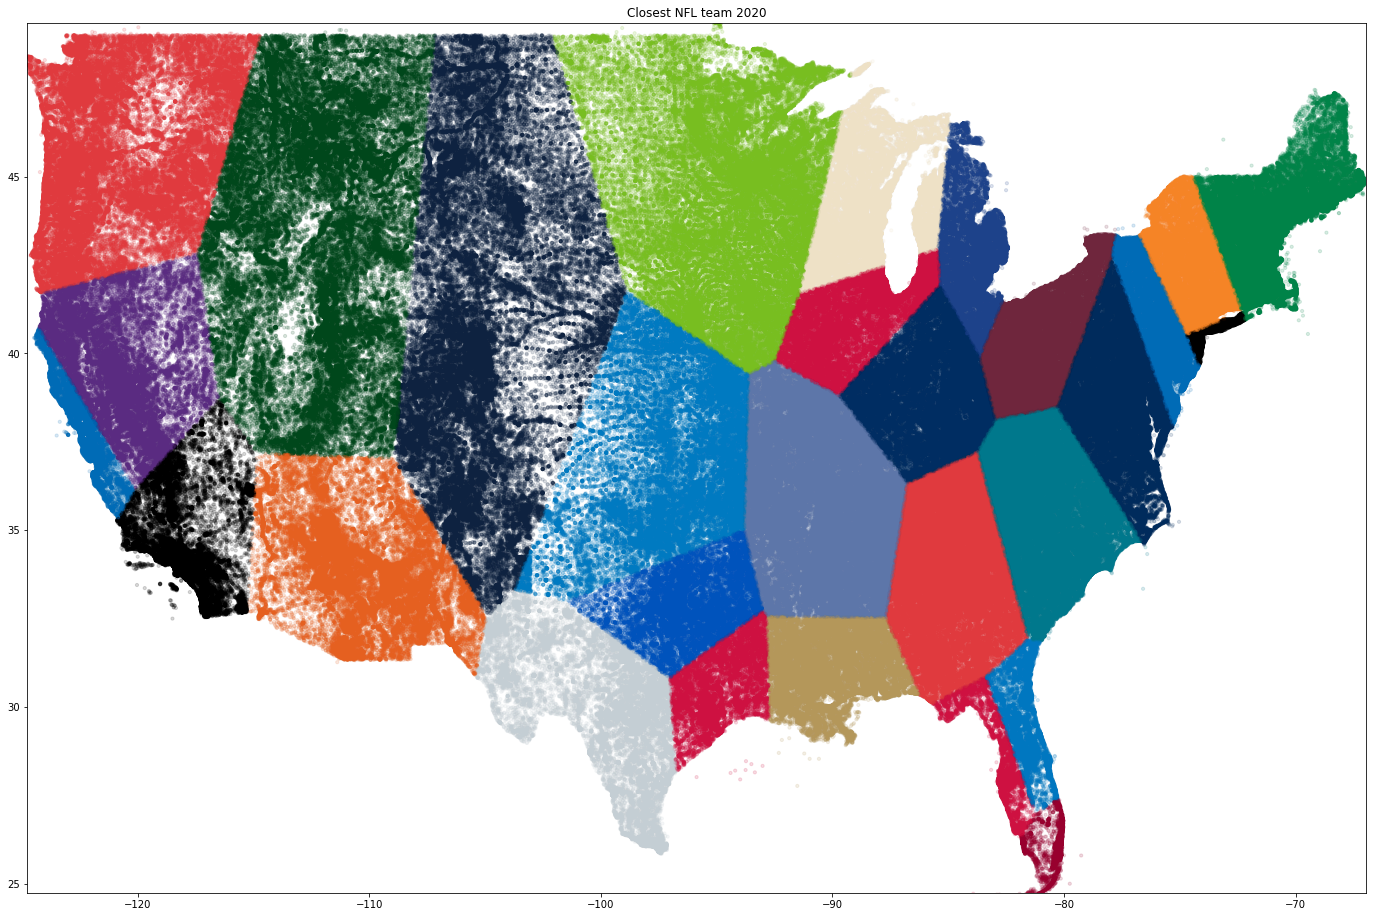


 2021
New stadium: 43°38′36″N 79°22′45″W


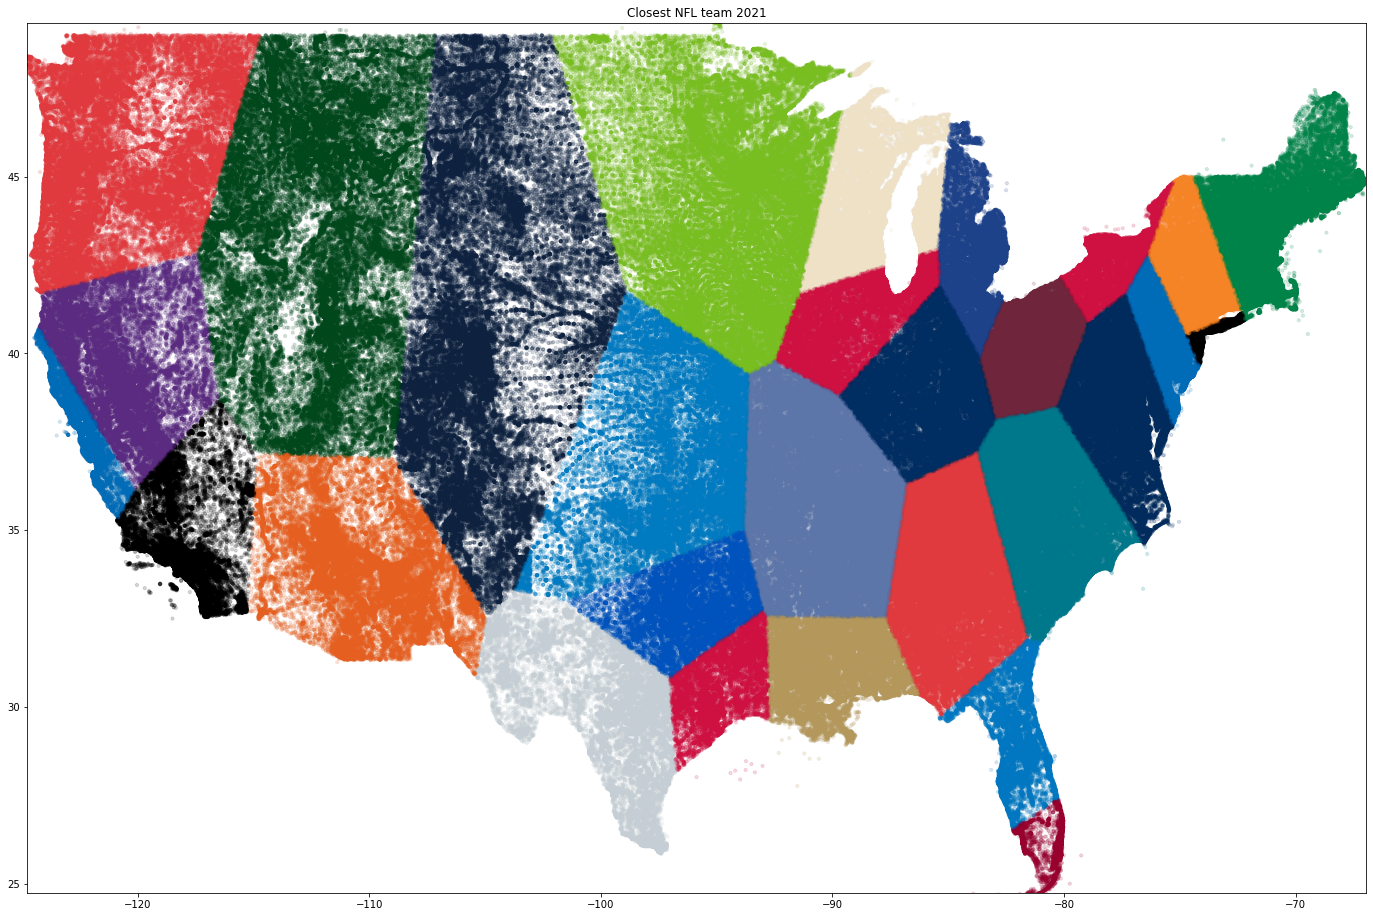

In [42]:
#for yr in range(1920, 2022):
#for yr in range(1920, 2021, 10):
first_loop = True
for yr in [2020, 2021]:
    stadia_this_year = [i for i in stadia_alltime if i[4] <= yr and i[5] >= yr]
    print('\n', yr)
    
    # print an alert for changes
    for team in stadia_this_year:
         if yr == team[4]:
            fore_fromhex('New stadium: ' + team[0], team[3])
    
    # get the closest stadium for every geographic point this year
    old_closest = closest_team
    closest_team = []
    for index, here in df_points.iterrows():
        min_dist = np.inf
        team = ''
        for ls_stadium in stadia_this_year:
            # Meas distances based on pythagorean theorem. There are better ways
            dist = math.sqrt(
                (here[1] - ls_stadium[2])**2 + (here[0] - ls_stadium[1])**2
                # lon^2 + lat^2
            )
            if dist < min_dist:
                min_dist = dist
                team = ls_stadium[3] # color for now instead
        closest_team.append(team)
    df_points['closest_team'] = closest_team
    
    df_changes = df_points[df_points['closest_team'] != old_closest]

    # Print a map of changes
    if not first_loop:
        # TODO: and if changes.shape[0] > 0:
        fig, axs = plt.subplots(figsize = (24, 16))
        axs.scatter(df_changes['longitude']
                   , df_changes['latitude']
                   , zorder = 1
                   , alpha = 0.15
                   , c = df_changes['closest_team'] # could map to color if 'closest_team' generalized
                   , s = 10
                  )
        axs.set_title('Changes in ' + str(yr))
        axs.set_xlim(BBox[0], BBox[1])
        axs.set_ylim(BBox[2], BBox[3])
        axs.set_yscale('linear')
        plt.show()

    # Print a full map
    fig, axs = plt.subplots(figsize = (24, 16))
    axs.scatter(df_points['longitude']
               , df_points['latitude']
               , zorder = 1
               , alpha = 0.15
               , c = df_points['closest_team'] # could map to color if 'closest_team' generalized
               , s = 10
              )
    axs.set_title('Closest NBA team ' + str(yr))
    axs.set_xlim(BBox[0], BBox[1])
    axs.set_ylim(BBox[2], BBox[3])
    axs.set_yscale('linear')    
    # add the black dots for stadia
    #plt.imshow()
    
    plt.show()
    # plt.imsave()
    
    first_loop = False

1343713
1343713


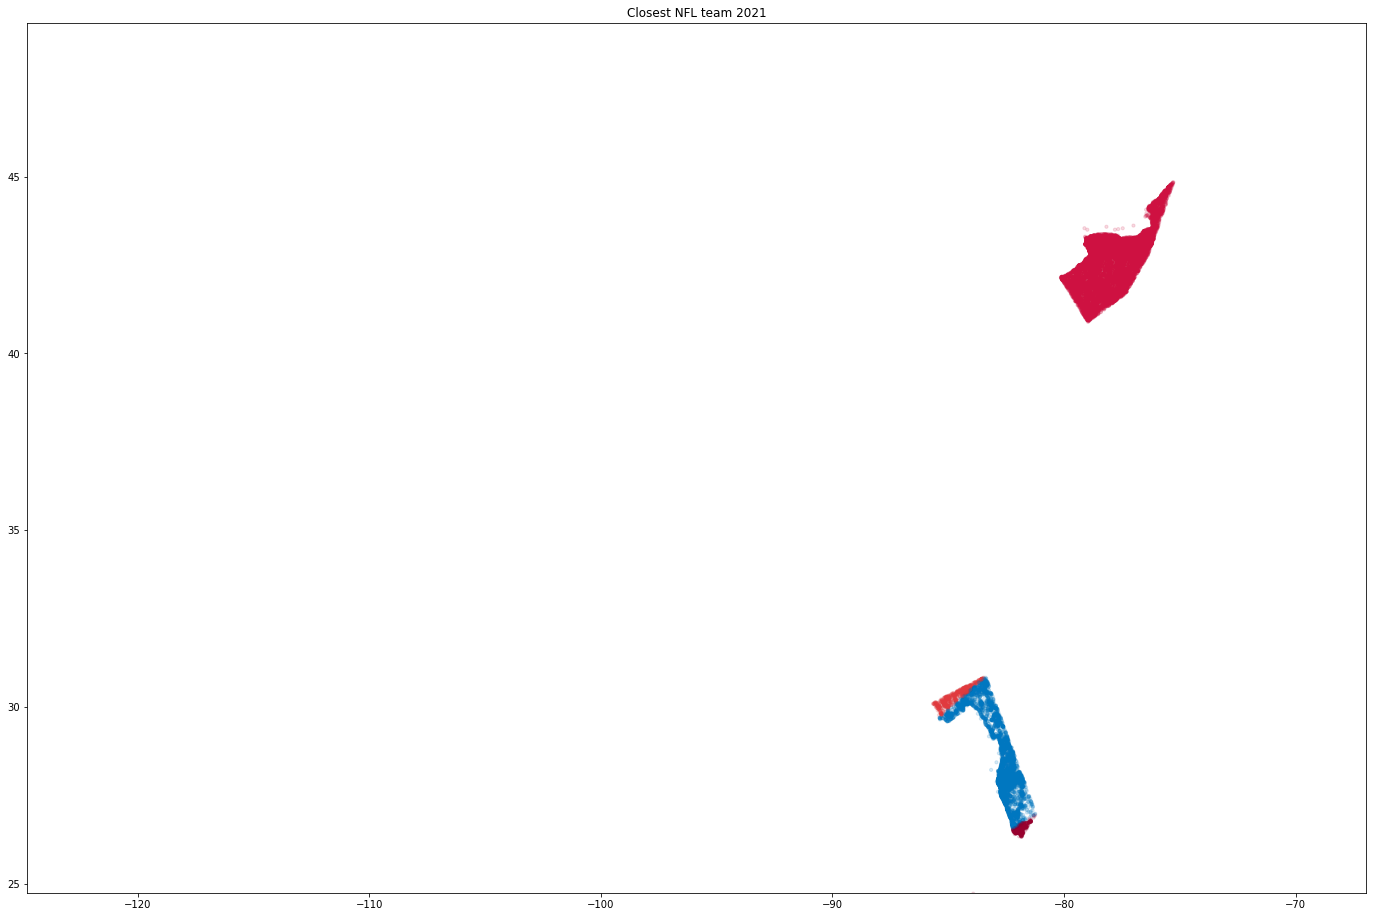

In [44]:
# test
print(len(old_closest))
print(len(df_points['closest_team']))



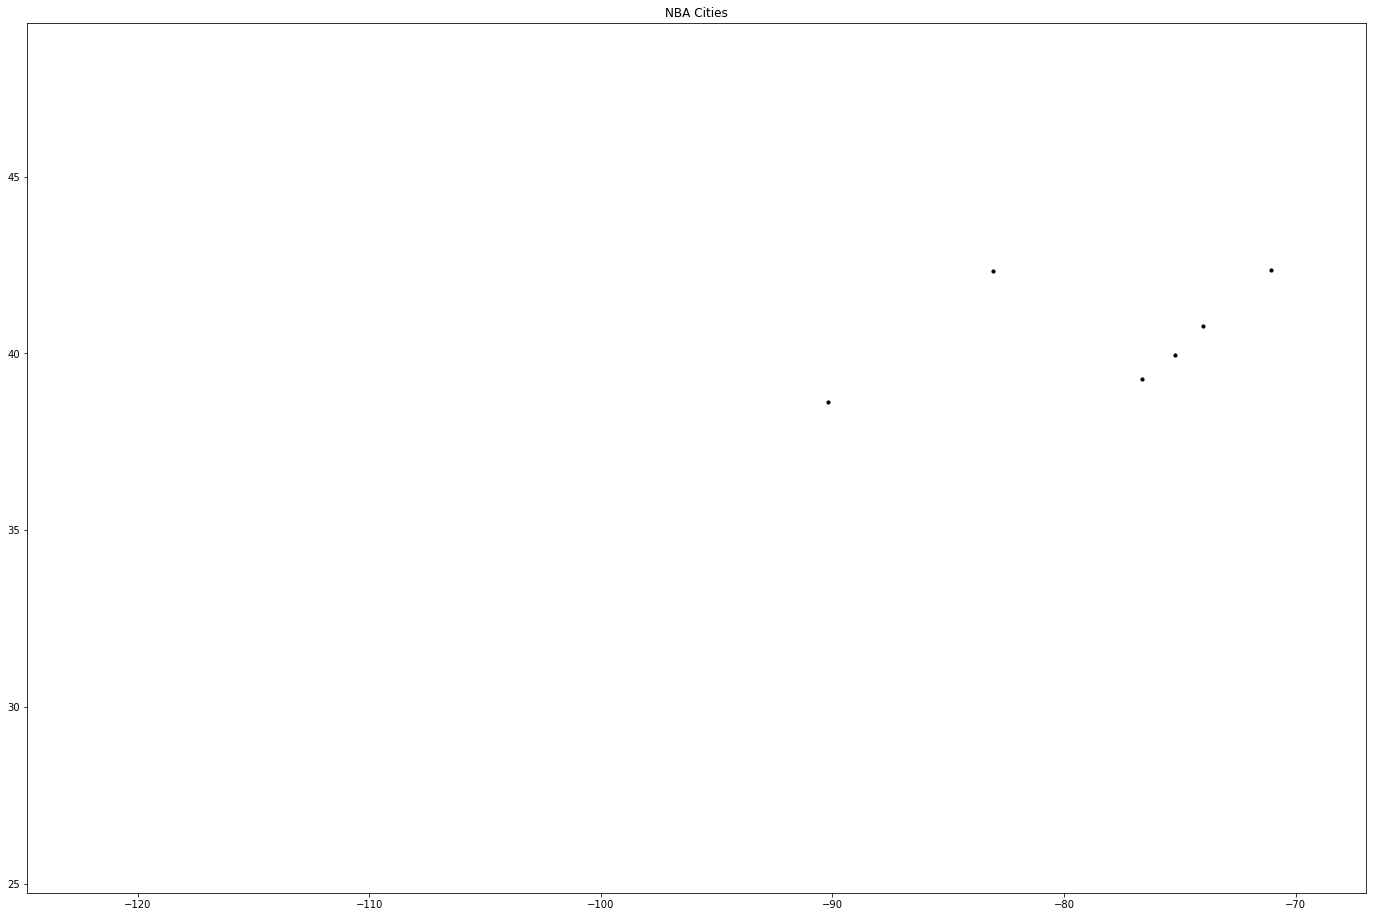

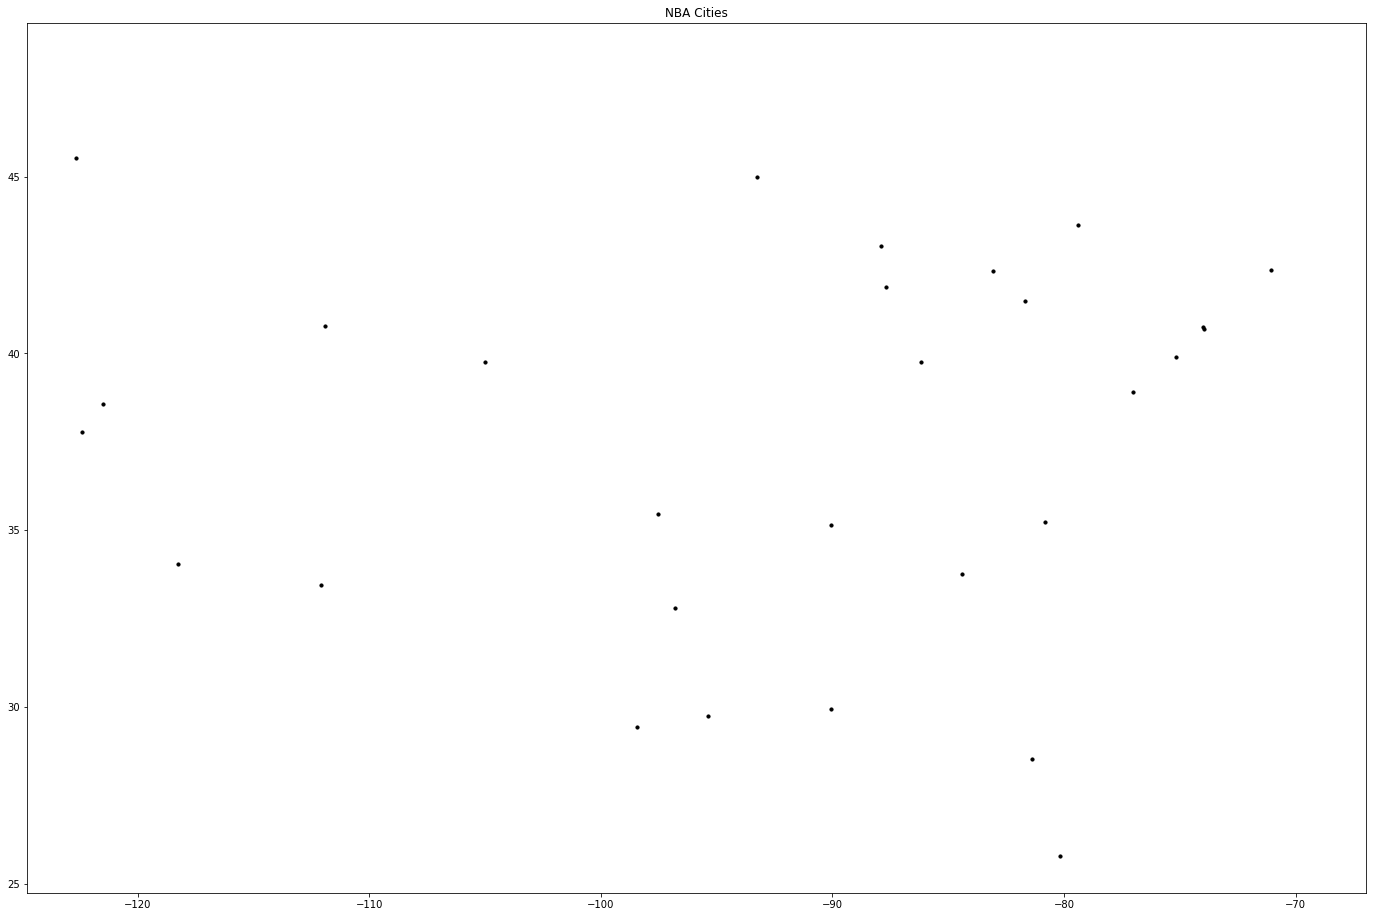

In [27]:
# Plot layer with just points for stadium location
#for yr in range(1920, 2021, 10):
for yr in [1965, 2021]:
    stadia_this_year = pd.DataFrame(
        [i for i in stadia_alltime if i[4] <= yr and i[5] >= yr]
    )
    
    fig, axs = plt.subplots(figsize = (24, 16))
    axs.scatter(stadia_this_year[:][2] # west
                   , stadia_this_year[:][1] # north
                   , zorder = 1
                   , alpha = 1
                   , c = 'black'
                   , s = 10
               )

    axs.set_title('NBA Cities')
    axs.set_xlim(BBox[0], BBox[1])
    axs.set_ylim(BBox[2], BBox[3])
    axs.set_yscale('linear')

    plt.show()